In [89]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [90]:
estimates = pd.read_csv('./data/result.csv')

In [91]:
estimates['eta_ape'] = abs((estimates['eta'] - estimates['ata']) / estimates['ata'])
estimates['hongijan_ape'] = abs((estimates['hongijan'] - estimates['ata']) / estimates['ata'])

In [93]:
estimates['timeOfDay'] = pd.to_datetime(estimates['createdAt']).map(lambda x: x.hour * 60 + x.minute)
estimates['timeOfWeek'] = pd.to_datetime(estimates['createdAt']).map(lambda x: x.dayofweek * 24 + x.hour)
estimates['dayOfWeek'] = pd.to_datetime(estimates['createdAt']).map(lambda x: x.dayofweek)

In [94]:
estimates.head(4)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>rideId</th>
      <th>eta</th>
      <th>ata</th>
      <th>createdAt</th>
      <th>hongijan</th>
      <th>eta_ape</th>
      <th>hongijan_ape</th>
      <th>timeOfDay</th>
      <th>timeOfWeek</th>
      <th>dayOfWeek</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>6325513</td>
      <td>772</td>
      <td>1021</td>
      <td>2018-11-23 16:56:39</td>
      <td>1054.228023</td>
      <td>0.243879</td>
      <td>0.032545</td>
      <td>1016</td>
      <td>112</td>
      <td>4</td>
    </tr>
    <tr>
      <th>1</th>
      <td>6849660</td>
      <td>635</td>
      <td>1445</td>
      <td>2018-11-23 09:56:29</td>
      <td>897.321037</td>
      <td>0.560554</td>
      <td>0.379017</td>
      <td>596</td>
      <td>105</td>
      <td>4</td>
    </tr>
    <tr>
      <th>2</th>
      <td>11363097</td>
      <td>1533</td>
      <td>1816</td>
      <td>2018-11-22 12:44:12</td>
      <td>1904.396255</td>
      <td>0.155837</td>
      <td>0.048676</td>
      <td>764</td>
      <td>84</td>
      <td>3</td>
    </tr>
    <tr>
      <th>3</th>
      <td>13276904</td>
      <td>1123</td>
      <td>1057</td>
      <td>2018-11-23 19:26:39</td>
      <td>1212.834349</td>
      <td>0.062441</td>
      <td>0.147431</td>
      <td>1166</td>
      <td>115</td>
      <td>4</td>
    </tr>
  </tbody>
</table>
</div>

In [95]:
estimates.sort_values(by='timeOfWeek', inplace=True)

In [96]:
estimates_withoutna = estimates[~estimates['hongijan'].isna()]

In [97]:
estimates.head(2)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>rideId</th>
      <th>eta</th>
      <th>ata</th>
      <th>createdAt</th>
      <th>hongijan</th>
      <th>eta_ape</th>
      <th>hongijan_ape</th>
      <th>timeOfDay</th>
      <th>timeOfWeek</th>
      <th>dayOfWeek</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>81986</th>
      <td>1505698593</td>
      <td>1354</td>
      <td>1255</td>
      <td>2018-11-19 00:08:42</td>
      <td>1729.954979</td>
      <td>0.078884</td>
      <td>0.37845</td>
      <td>8</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>13360</th>
      <td>1938055262</td>
      <td>1806</td>
      <td>1423</td>
      <td>2018-11-19 00:25:14</td>
      <td>1813.243591</td>
      <td>0.269150</td>
      <td>0.27424</td>
      <td>25</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

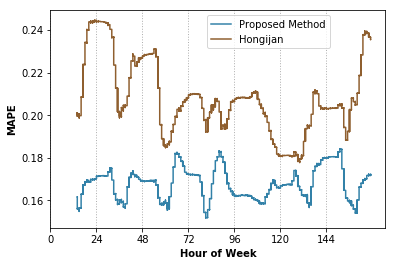

In [98]:
fig = plt.figure()
# plt.title('error w.r.t. time of week')
plt.plot(estimates['timeOfWeek'], estimates['eta_ape'].rolling(10000).mean(), color="#3281a8", label='Proposed Method')
plt.plot(estimates_withoutna['timeOfWeek'], estimates_withoutna['hongijan_ape'].rolling(10000).mean(), color="#8f5f2f", label='Hongijan')
plt.xlabel('Hour of Week', fontweight='bold')
plt.ylabel('MAPE', fontweight='bold')
plt.xticks([x * 24 for x in range(7)])
# for i in range(1, 7):
#     plt.axvline(i * 24, linestyle=':', linewidth=1)
plt.grid(axis='x', linestyle=':', linewidth=1)
plt.legend(bbox_to_anchor=(0.85, 1))
fig.savefig('plots/error-hour-week.png', dpi=1000)


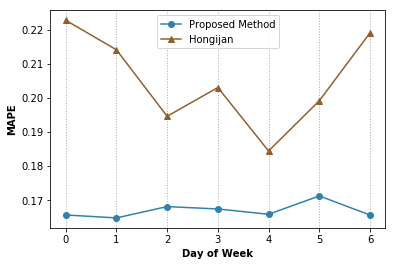

In [87]:
fig = plt.figure()

# plt.title('error w.r.t. day of week')
grouped = estimates.groupby('dayOfWeek').mean()
plt.plot(grouped.index, grouped['eta_ape'], color="#3281a8", label='Proposed Method', marker='o')
plt.plot(grouped.index, grouped['hongijan_ape'], color="#8f5f2f", label='Hongijan', marker='^')
plt.xlabel('Day of Week', fontweight='bold')
plt.ylabel('MAPE', fontweight='bold')
plt.xticks([x for x in range(7)])
plt.grid(axis='x', linestyle=':', linewidth=1)
plt.legend()
fig.savefig('plots/error-day.png', dpi=1000)

In [62]:
estimates.sort_values(by='timeOfDay', inplace=True)

In [63]:
estimates.head(2)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>rideId</th>
      <th>eta</th>
      <th>ata</th>
      <th>createdAt</th>
      <th>hongijan</th>
      <th>eta_ape</th>
      <th>hongijan_ape</th>
      <th>timeOfDay</th>
      <th>timeOfWeek</th>
      <th>dayOfWeek</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>92669</th>
      <td>1483100339</td>
      <td>950</td>
      <td>1016</td>
      <td>2018-11-20 00:00:12</td>
      <td>994.051836</td>
      <td>0.064961</td>
      <td>0.021603</td>
      <td>0</td>
      <td>24</td>
      <td>1</td>
    </tr>
    <tr>
      <th>50822</th>
      <td>1545818947</td>
      <td>1970</td>
      <td>1639</td>
      <td>2018-11-22 00:00:35</td>
      <td>1512.091930</td>
      <td>0.201952</td>
      <td>0.077430</td>
      <td>0</td>
      <td>72</td>
      <td>3</td>
    </tr>
  </tbody>
</table>
</div>

In [64]:
estimates_withoutna = estimates[~estimates['hongijan'].isna()]

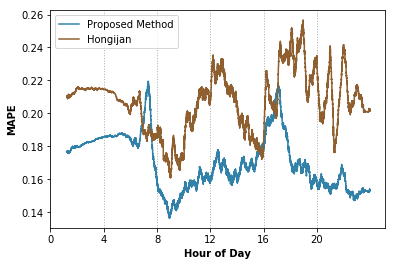

In [86]:
fig = plt.figure()

# plt.title('error w.r.t. hour of day')

plt.plot(estimates['timeOfDay'] / 60, estimates['eta_ape'].rolling(2000).mean(), color="#3281a8", label='Proposed Method')
plt.plot(estimates_withoutna['timeOfDay'] / 60, estimates_withoutna['hongijan_ape'].rolling(2000).mean(), color="#8f5f2f", label='Hongijan')
# for i in range(1, 8):
#     plt.axvline(i * 3 * 60, linestyle='--')
plt.xticks([x * 4 for x in range(6)])
plt.xlabel('Hour of Day', fontweight='bold')
plt.ylabel('MAPE', fontweight='bold')
plt.legend()
plt.grid(axis='x', linestyle=':', linewidth=1)
fig.savefig('plots/error-hour-day.png', dpi=1000)
